<a href="https://colab.research.google.com/github/Carlys222/ESTAD-STICA-2/blob/main/practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE A

Seleccion de marca y obtencion de los datos

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='TSLA',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2023-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
...,...,...,...,...,...,...
2025-03-25,283.600006,288.200012,271.279999,288.140015,288.140015,150361500
2025-03-26,282.660004,284.899994,266.510010,272.059998,272.059998,153629800
2025-03-27,272.480011,291.850006,271.820007,273.130005,273.130005,162572100


Graficar la serie de tiempo

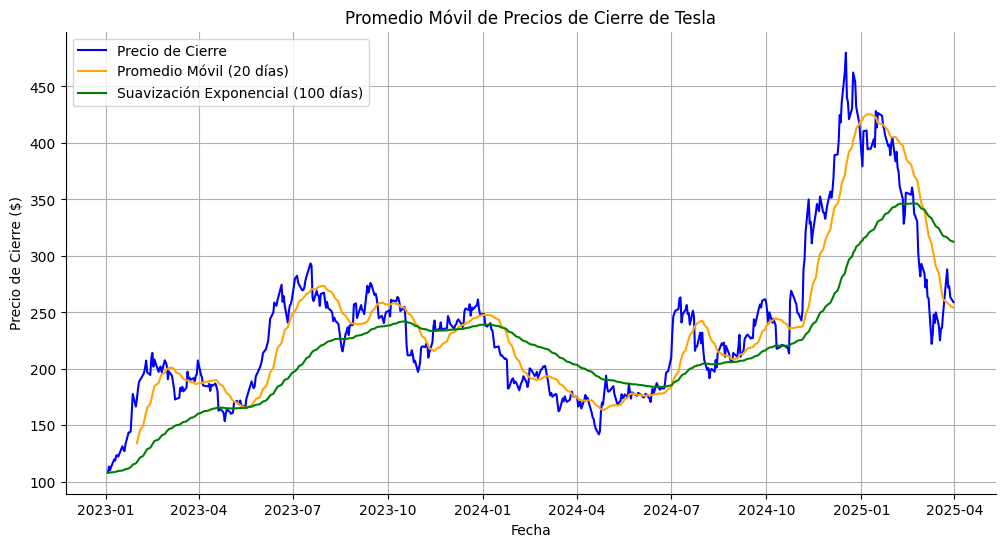

In [28]:
# Medias móviles

# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['TSLA_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['TSLA_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TSLA_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La gráfica muestra una alta volatilidad en el precio de cierre de Tesla entre enero de 2023 y abril de 2025.
Se identifican tendencias alcistas y bajistas, lo que sugiere que el comportamiento no es constante.
Las líneas de promedios móviles (SMA y SES) suavizan la serie, ayudando a visualizar la tendencia general:
La SMA (promedio móvil simple) de 20 días responde más lentamente a los cambios.
La SES (suavización exponencial) de 100 días proporciona una tendencia más estable.
En general, la serie muestra comportamiento no estacionario a simple vista, ya que hay variaciones en la media a lo largo del tiempo.

# PARTE B

Prueba de estacionariedad

In [29]:
# Prueba Dickey-Fuller Aumentada

#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['TSLA_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -2.1457242329361406
p-value: 0.22653033205510775
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Interpretación: La serie tiene una raíz unitaria ⇒ no es estacionaria.

Esto significa que la media y varianza cambian con el tiempo, lo cual afecta la posibilidad de modelar directamente la serie sin transformaciones.
Esto implica que la serie de precios de cierre no es estacionaria, es decir, su media y varianza cambian a lo largo del tiempo.

# PARTE C


Regresion polinomial

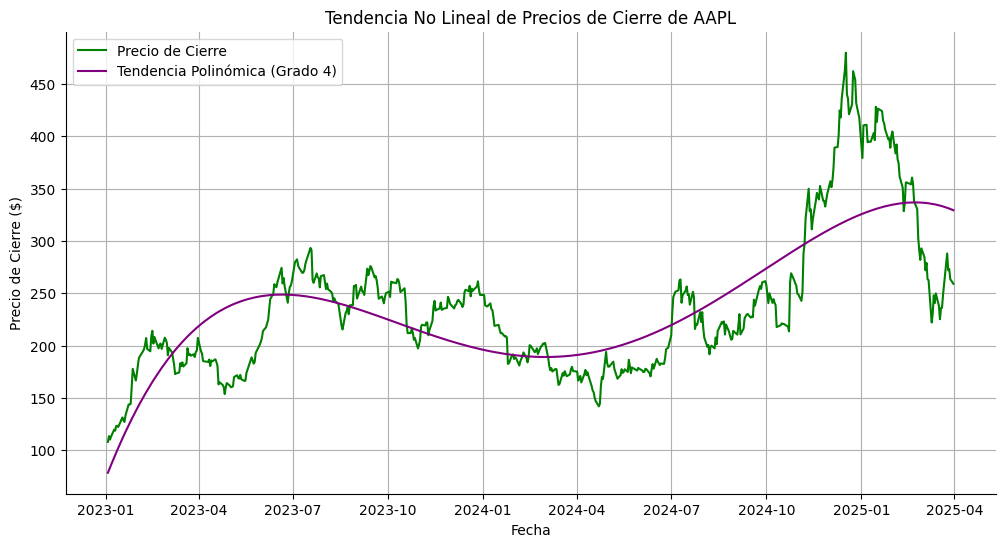

In [30]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TSLA_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de TSLA') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)


Ajusta una curva no lineal capaz de capturar los cambios complejos en la tendencia del precio de cierre.

Permite descomponer la serie en dos componentes:

Una tendencia determinista (explicada por el polinomio).

Un componente aleatorio (los residuales), que se espera sea estacionario.
La elección del grado 4 es adecuada para evitar subajuste (underfitting) y sobreajuste (overfitting) al mismo tiempo, proporcionando un balance entre precisión y generalización.

Prueba de estacionariedad en los residuales

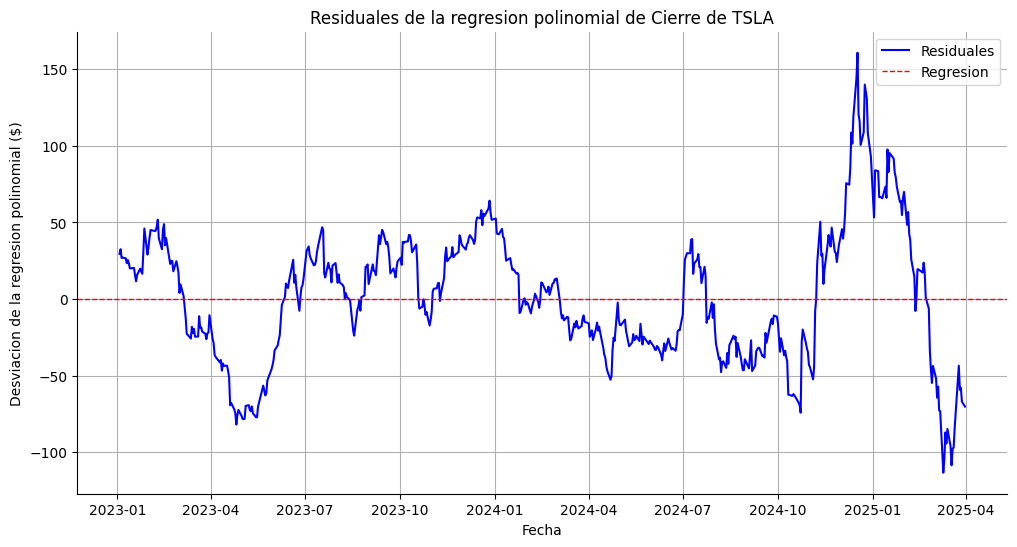

In [31]:

# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Prueba de estacionariedad en los residuos

In [35]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna())

print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -2.378042395557255
p-value: 0.14802991991457648
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Tras eliminar la tendencia mediante el modelo polinomial de grado 4, se analizaron los residuales:
Visualmente, los residuales oscilan alrededor de cero y no presentan una tendencia clara ni grandes variaciones en su varianza, lo cual sugiere una posible estacionariedad.
Sin embargo, la prueba estadística ADF aplicada a los residuales arrojó un p-value de 0.148, que es mayor al nivel de significancia del 5%.
Esto significa que no se puede rechazar la hipótesis nula de que los residuales tienen una raíz unitaria, es decir, los residuales no son estacionarios estadísticamente.
Interpretación final: Aunque visualmente parecen estables, los residuales aún presentan componentes de no estacionariedad. Por lo tanto, la regresión polinomial de grado 4 no fue suficiente para eliminar completamente la tendencia, y será necesario aplicar transformaciones adicionales o probar con un modelo de mayor grado o técnicas más robustas de descomposición.

Estadístico ADF: -2.379

p-value: 0.148

Nivel de significancia: 0.05
Interpretación:
El p-value es mayor a 0.05, por lo tanto:
No se rechaza la hipótesis nula.
Es decir, los residuales no son estacionarios.

Esto indica que, aunque se eliminó parte de la tendencia con la regresión polinomial, persisten patrones de no estacionariedad en la serie residual

#CONCLUSION

El análisis realizado sobre la serie temporal del precio de cierre de las acciones de Tesla (TSLA) tuvo como objetivo evaluar su estacionariedad y modelar su comportamiento utilizando una regresión polinomial.

En la primera etapa, se confirmó mediante la prueba de Dickey-Fuller aumentada (ADF) que la serie original no es estacionaria, lo cual implica que su media y varianza cambian con el tiempo. Este resultado descarta el uso directo de modelos clásicos como ARIMA sin realizar transformaciones previas.

Para abordar esta no estacionariedad, se aplicó una regresión polinomial de grado 4 con el fin de capturar la tendencia no lineal de la serie. A partir de esta regresión se obtuvieron los residuales, que representan la parte no explicada por el modelo.

Aunque visualmente los residuales parecían oscilar de manera estable alrededor de cero, la prueba ADF aplicada a ellos arrojó un p-value de 0.148, lo cual indica que los residuales tampoco son estacionarios desde el punto de vista estadístico.

Por lo tanto, se concluye que la regresión polinomial aplicada no fue suficiente para eliminar completamente la tendencia de la serie, y es necesario considerar otras transformaciones (como diferenciación, modelos de mayor grado o descomposición avanzada) para lograr una representación estacionaria y, con ello, viabilizar modelos predictivos robustos.

Este proceso evidencia la importancia de validar visual y estadísticamente la estacionariedad en series temporales, especialmente al preparar datos financieros para análisis y pronóstico.